In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv"
                   )


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# EmbarkedのOne-hot エンコーディング
train = pd.get_dummies(train, columns=["Embarked"])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [9]:
# 性別をバイナリ変数に
train["Sex"] = train["Sex"].apply(lambda x: 0 if x == "male" else 1)
test["Sex"] = test["Sex"].apply(lambda x: 0 if x == "male" else 1)

In [10]:
# 欠損値補完 平均値
mean_train_Age = train["Age"].mean()
train["Age"].fillna(mean_train_Age, inplace=True)
mean_test_Age = test["Age"].mean()
test["Age"].fillna(mean_test_Age, inplace=True)

mean_train_fare = train["Fare"].mean()
train["Fare"].fillna(mean_train_fare, inplace=True)
mean_test_fare = test["Fare"].mean()
test["Fare"].fillna(mean_test_fare, inplace=True)

C:\Users\nanoh\AppData\Local\Temp\ipykernel_38208\3122784971.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mean_train_Age, inplace=True)
C:\Users\nanoh\AppData\Local\Temp\ipykernel_38208\3122784971.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [12]:
# 年齢の正規化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train["Age_standard"] = sc.fit_transform(train[["Age"]])
test["Age_standard"] = sc.fit_transform(test[["Age"]])

In [13]:
# Fareの正規化
train["Fare_standard"] = sc.fit_transform(train[["Fare"]])
test["Fare_standard"] = sc.fit_transform(test[["Fare"]])

### 新しい特徴量生成

In [14]:
# 一緒に来た人の人数
train["member_num"] = train["SibSp"] + train["Parch"]
test["member_num"] = test["SibSp"] + test["Parch"]

print(train["member_num"])

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: member_num, Length: 891, dtype: int64


In [15]:
# 一人旅か否か
train["alone"] = train["member_num"].apply(lambda x: 0 if x >= 1 else 1)
test["alone"] = test["member_num"].apply(lambda x: 0 if x >= 1 else 1)

In [16]:
train.member_num.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: member_num, dtype: float64

<Axes: >

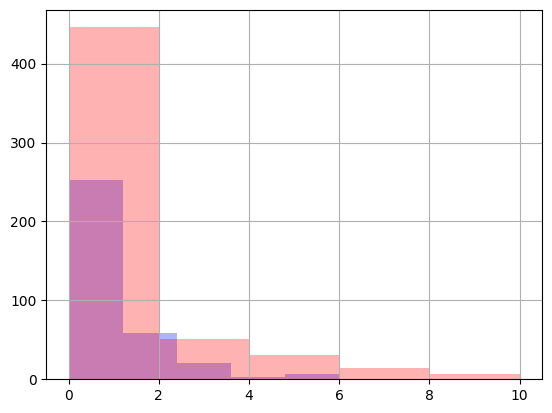

In [17]:
train[train["Survived"] == 1]["member_num"].hist(bins=5, alpha=0.3, color="blue")
train[train["Survived"] == 0]["member_num"].hist(bins=5, alpha=0.3, color="red")

## データの可視化・色々お試し

C:\Users\nanoh\AppData\Local\Temp\ipykernel_38208\2359280989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train, palette="Set3")


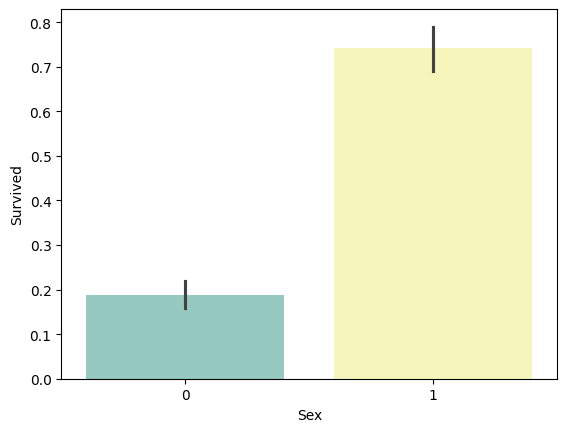

In [18]:
sns.barplot(x="Sex", y="Survived", data=train, palette="Set3")
plt.show()

C:\Users\nanoh\AppData\Local\Temp\ipykernel_38208\1121270268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train, palette="Set3")


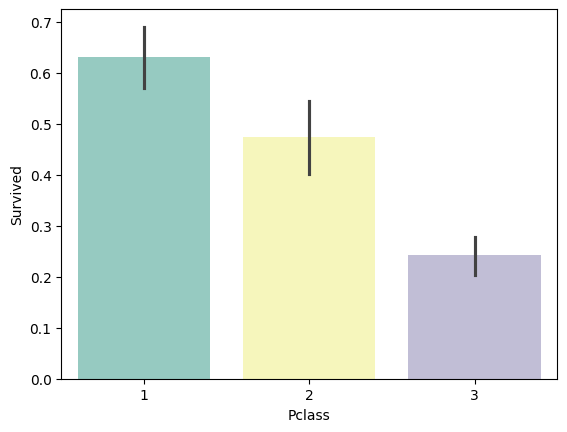

In [19]:
sns.barplot(x="Pclass", y="Survived", data=train, palette="Set3")
plt.show()

<Axes: >

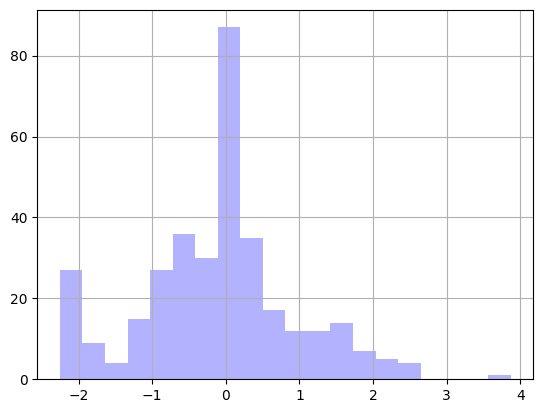

In [20]:
train[train["Survived"] == 1]["Age_standard"].hist(bins=20, alpha=0.3, color="blue")

### モデル作成・学習

In [21]:
# 予測に使用する列名
cols = ["Pclass", "Sex", "Age_standard", "member_num"]

# 学習用
X_train = train[cols]
y_train = train["Survived"]

# 予測用
X_test = test[cols]

X_test.head()

,Pclass,Sex,Age_standard,member_num
0,3,0,0.334993,0
1,3,1,1.325530,1
2,2,0,2.514175,0
3,3,0,-0.259330,0
4,3,1,-0.655545,2


In [22]:
from sklearn.linear_model import LogisticRegression

# モデル作成（ロジスティック回帰）
lg_model = LogisticRegression(solver="liblinear", random_state=42)

# 学習
lg_model.fit(X_train, y_train)
# 予測
y_test = lg_model.predict(X_test)

pd.Series(y_test).value_counts()

0    260
1    158
Name: count, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestClassifier

# モデル作成（ランダムフォレスト）
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# 学習
rf_model.fit(X_train, y_train)
# 予測
y_test = rf_model.predict(X_test)

pd.Series(y_test).value_counts()

0    263
1    155
Name: count, dtype: int64

In [27]:
import lightgbm as lgb

# モデル作成（LightGBM）
lgb_model = lgb.LGBMClassifier(max_depth=5, verbose=-1, random_state=42)

# 学習
lgb_model.fit(X_train, y_train)

# 予測
y_test = lgb_model.predict(X_test)

pd.Series(y_test).value_counts()

0    270
1    148
Name: count, dtype: int64

# 検証

In [28]:
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 交差検証で正答率を検証
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")
lg_scores = cross_val_score(lg_model, X_train, y_train, cv=5, scoring="accuracy")
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring="accuracy")

print(f"Random Forest Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")
print(f"Logistic Regression Accuracy: {lg_scores.mean():.4f} ± {lg_scores.std():.4f}")
print(f"LightGBM Accuracy: {lgb_scores.mean():.4f} ± {lgb_scores.std():.4f}")

Random Forest Accuracy: 0.8305 ± 0.0150
Logistic Regression Accuracy: 0.7901 ± 0.0092
LightGBM Accuracy: 0.8306 ± 0.0242


### 提出用csvファイル作成

In [29]:
# モデルの学習と予測（必要に応じて）
rf_model.fit(X_train, y_train)
lg_model.fit(X_train, y_train)

# テストデータに対する予測（例）
rf_predictions = rf_model.predict(X_test)

PassengerId = test["PassengerId"]

submission = pd.DataFrame(
    {"PassengerId": PassengerId, "Survived": rf_predictions.astype(np.int32)}
)
submission.to_csv("my_submission.csv", index=False)